In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats

In [2]:
initial_dataframe = pd.read_csv('data/pbp-alldata.csv', error_bad_lines=False)
initial_dataframe.head()

b'Skipping line 5011: expected 45 fields, saw 48\nSkipping line 14753: expected 45 fields, saw 46\n'
b'Skipping line 17296: expected 45 fields, saw 48\nSkipping line 17310: expected 45 fields, saw 48\n'
b'Skipping line 37361: expected 45 fields, saw 48\nSkipping line 37368: expected 45 fields, saw 48\nSkipping line 42837: expected 45 fields, saw 46\n'
/Users/varunmeduri/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2013091512,2013-09-15,4,5,9,JAX,LV,4,13,16,...,0.0,0,NaN,16,OWN,1.0,OAK,0.0,OFFENSIVE HOLDING,10.0
1,2013091512,2013-09-15,4,0,36,JAX,LV,2,10,65,...,0.0,0,NaN,35,OPP,0.0,NaN,0.0,NaN,0.0
2,2013091512,2013-09-15,4,5,21,JAX,LV,3,6,23,...,0.0,0,NaN,23,OWN,0.0,NaN,0.0,NaN,0.0
3,2013091512,2013-09-15,4,5,24,JAX,LV,2,6,23,...,0.0,0,NaN,23,OWN,0.0,NaN,0.0,NaN,0.0
4,2013091512,2013-09-15,4,5,55,JAX,LV,1,10,19,...,0.0,0,NaN,19,OWN,0.0,NaN,0.0,NaN,0.0


In [3]:
print(list(initial_dataframe))

['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam', 'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Unnamed: 10', 'SeriesFirstDown', 'Unnamed: 12', 'NextScore', 'Description', 'TeamWin', 'Unnamed: 16', 'Unnamed: 17', 'SeasonYear', 'Yards', 'Formation', 'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown', 'PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed', 'Challenger', 'IsMeasurement', 'IsInterception', 'IsFumble', 'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful', 'RushDirection', 'YardLineFixed', 'YardLineDirection', 'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType', 'PenaltyYards']


In [4]:
initial_dataframe.isna().any()

GameId                            False
GameDate                          False
Quarter                           False
Minute                            False
Second                            False
OffenseTeam                        True
DefenseTeam                        True
Down                              False
ToGo                              False
YardLine                          False
Unnamed: 10                        True
SeriesFirstDown                   False
Unnamed: 12                        True
NextScore                         False
Description                        True
TeamWin                           False
Unnamed: 16                        True
Unnamed: 17                        True
SeasonYear                        False
Yards                             False
Formation                          True
PlayType                           True
IsRush                            False
IsPass                            False
IsIncomplete                       True


In [5]:
initial_dataframe['OffenseTeam'] = initial_dataframe['OffenseTeam'].fillna('No Offensive Team')
initial_dataframe['DefenseTeam'] = initial_dataframe['DefenseTeam'].fillna('No Defensive Team')
initial_dataframe['Description'] = initial_dataframe['Description'].fillna('No Description')
initial_dataframe['Formation'] = initial_dataframe['Formation'].fillna('No Formation')
initial_dataframe['PlayType'] = initial_dataframe['PlayType'].fillna('No Play Type')
initial_dataframe['IsIncomplete'] = initial_dataframe['IsIncomplete'].fillna(0)
initial_dataframe['PassType'] = initial_dataframe['PassType'].fillna('No Pass')
initial_dataframe['Challenger'] = initial_dataframe['Challenger'].fillna('No Challenger')
initial_dataframe['IsMeasurement'] = initial_dataframe['IsMeasurement'].fillna(0)
initial_dataframe['IsTwoPointConversion'] = initial_dataframe['IsTwoPointConversion'].fillna(0)
initial_dataframe['RushDirection'] = initial_dataframe['RushDirection'].fillna('No Rush Direction')
initial_dataframe['YardLineDirection'] = initial_dataframe['YardLineDirection'].fillna('OWN')
initial_dataframe['IsPenaltyAccepted'] = initial_dataframe['IsPenaltyAccepted'].fillna(0)
initial_dataframe['PenaltyTeam'] = initial_dataframe['PenaltyTeam'].fillna('None')
initial_dataframe['IsNoPlay'] = initial_dataframe['IsNoPlay'].fillna(0)
initial_dataframe['PenaltyType'] = initial_dataframe['PenaltyType'].fillna('No Penalty')
initial_dataframe['PenaltyYards'] = initial_dataframe['PenaltyYards'].fillna(0)
initial_dataframe = initial_dataframe.drop(columns=['Unnamed: 10', 'Unnamed: 12', 'Unnamed: 16', 'Unnamed: 17'])

In [6]:
initial_dataframe.isna().any()

GameId                            False
GameDate                          False
Quarter                           False
Minute                            False
Second                            False
OffenseTeam                       False
DefenseTeam                       False
Down                              False
ToGo                              False
YardLine                          False
SeriesFirstDown                   False
NextScore                         False
Description                       False
TeamWin                           False
SeasonYear                        False
Yards                             False
Formation                         False
PlayType                          False
IsRush                            False
IsPass                            False
IsIncomplete                      False
IsTouchdown                       False
PassType                          False
IsSack                            False
IsChallenge                       False


In [7]:
cleaned_df = initial_dataframe.copy()

In [62]:
cleaned_df.head()
cleaned_df

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2013091512,2013-09-15,4,5,9,JAX,LV,4,13,16,...,0.0,0,No Rush Direction,16,OWN,1.0,OAK,0.0,OFFENSIVE HOLDING,10.0
1,2013091512,2013-09-15,4,0,36,JAX,LV,2,10,65,...,0.0,0,No Rush Direction,35,OPP,0.0,None,0.0,No Penalty,0.0
2,2013091512,2013-09-15,4,5,21,JAX,LV,3,6,23,...,0.0,0,No Rush Direction,23,OWN,0.0,None,0.0,No Penalty,0.0
3,2013091512,2013-09-15,4,5,24,JAX,LV,2,6,23,...,0.0,0,No Rush Direction,23,OWN,0.0,None,0.0,No Penalty,0.0
4,2013091512,2013-09-15,4,5,55,JAX,LV,1,10,19,...,0.0,0,No Rush Direction,19,OWN,0.0,None,0.0,No Penalty,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364585,2020091300,2020-09-13,4,1,38,ATL,SEA,2,9,80,...,0.0,0,No Rush Direction,20,OPP,0.0,None,0.0,No Penalty,0.0
364586,2020091300,2020-09-13,4,5,18,No Offensive Team,No Defensive Team,0,0,100,...,0.0,0,No Rush Direction,0,OPP,0.0,None,0.0,No Penalty,0.0
364587,2020091300,2020-09-13,4,2,0,ATL,SEA,1,10,79,...,0.0,0,No Rush Direction,21,OPP,0.0,None,0.0,No Penalty,0.0
364588,2020091300,2020-09-13,4,2,0,No Offensive Team,No Defensive Team,0,0,100,...,0.0,0,No Rush Direction,0,OPP,0.0,None,0.0,No Penalty,0.0


Text(0.5, 1.0, 'Distribution of each play type')

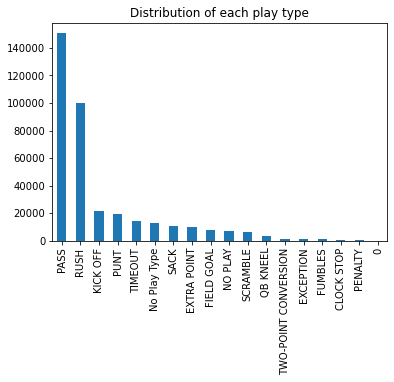

In [9]:
ax = cleaned_df['PlayType'].value_counts().plot(kind='bar')
ax.set_title('Distribution of each play type')

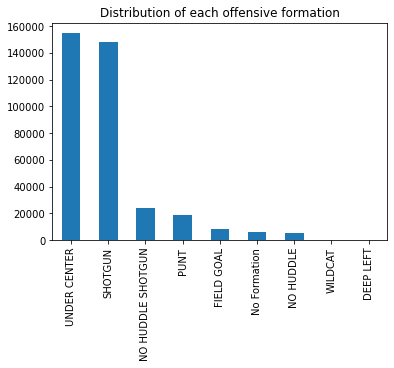

In [66]:
ax = cleaned_df['Formation'].value_counts().plot(kind='bar')
ax.set_title('Distribution of each offensive formation')
plt.savefig('FormationDistribution.png')

In [10]:
grouped = cleaned_df.groupby('Quarter').mean()
grouped['Yards']

Quarter
1    4.287219
2    4.089221
3    4.484038
4    3.952360
5    4.151824
Name: Yards, dtype: float64

In [11]:
# classify the teams into high shotgun formation usage vs low shotgun formation usage
# Test whether or not high shotgun formation usage results in a significantly larger win percentage.

In [30]:
formations_per_team = cleaned_df.groupby('OffenseTeam').count()
print(list(formations_per_team))
formations_per_team = formations_per_team.reset_index()
formations_per_team['Formation']
formations_per_team['Formation'].mean()
formations_per_team['OffenseTeam'][1]

['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'SeriesFirstDown', 'NextScore', 'Description', 'TeamWin', 'SeasonYear', 'Yards', 'Formation', 'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown', 'PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed', 'Challenger', 'IsMeasurement', 'IsInterception', 'IsFumble', 'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful', 'RushDirection', 'YardLineFixed', 'YardLineDirection', 'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType', 'PenaltyYards']


'ATL'

In [67]:
shotguns_df = cleaned_df[cleaned_df['Formation'] == 'SHOTGUN']
shotguns_per_team = shotguns_df.groupby('OffenseTeam').count()
shotguns_per_team = shotguns_per_team.reset_index()
shotguns_per_team['Formation']
# shotguns_per_team['Formation'].mean()

0     4033
1     3893
2     4921
3     4992
4     5239
5     5060
6     5153
7     4762
8     4298
9     4362
10    4866
11    4657
12    5311
13    4889
14    4987
15    5716
16    3239
17    2535
18    4820
19    5264
20    3799
21    4091
22    4387
23    3470
24    4918
25       1
26    4627
27    4890
28    2794
29    5303
30    4034
31    4014
32    3874
33    4801
Name: Formation, dtype: int64

In [16]:
print(4352.941176470588/10723.235294117647)

0.40593543432348667


In [28]:
shotgun_yards_sum_per_team = shotguns_df.groupby('OffenseTeam').sum()
shotgun_yards_sum_per_team = shotgun_yards_sum_per_team.reset_index()
shotgun_yards_sum_per_team['Yards']

0     23527
1     24093
2     26916
3     28652
4     30021
5     28790
6     28939
7     25277
8     26088
9     25448
10    28086
11    26695
12    29759
13    28635
14    27256
15    35158
16    17792
17    15978
18    28361
19    29218
20    21303
21    24690
22    28820
23    19465
24    26760
25       -3
26    25437
27    29832
28    16780
29    31113
30    23352
31    24259
32    22278
33    27127
Name: Yards, dtype: int64

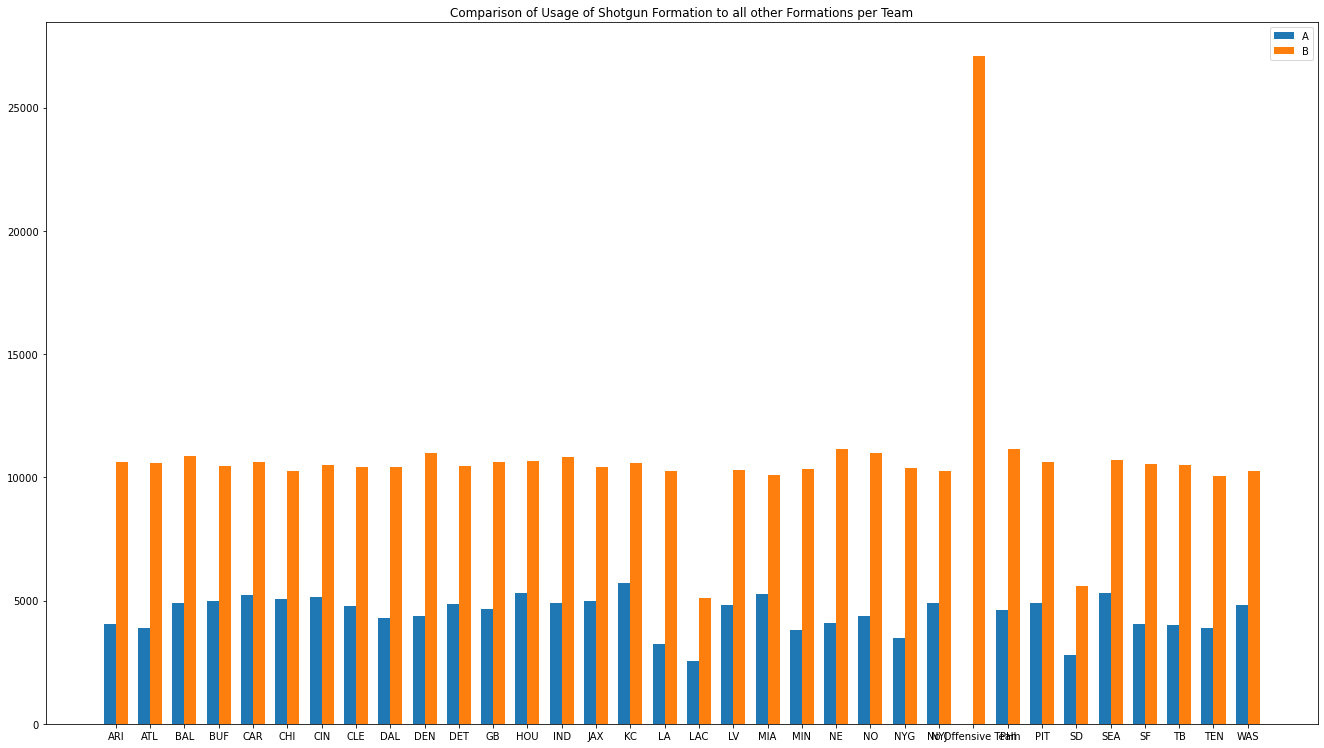

<Figure size 432x288 with 0 Axes>

In [75]:
def make_bar_plot(means_a, means_b, labels):
    '''
    Create a barplot

    Parameters
    ----------
    means_a: {list of {float}} means of property a in each group
    means_b: {list of {float}} means of property b in each group
    labels: {list of {str}} names of groups

    Returns
    -------
    None
    '''
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    rects1 = ax.bar(x - width/2, means_a, width, label='A')
    rects2 = ax.bar(x + width/2, means_b, width, label='B')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.set_title('Comparison of Usage of Shotgun Formation to all other Formations per Team')
    fig.tight_layout()
    plt.show()

make_bar_plot(shotguns_per_team['Formation'], formations_per_team['Formation'], shotguns_per_team['OffenseTeam'])
plt.savefig('ShotgunsBarComparisonPerTeam.png')

In [73]:
teams_above_shotgun_threshold = []
teams_below_shotgun_threshold = []
for i in range(len(shotguns_per_team['Formation'])):
    if shotguns_per_team['Formation'][i] / formations_per_team['Formation'][i] >= 0.40593543432348667:
        teams_above_shotgun_threshold.append(shotguns_per_team['OffenseTeam'][i])
    else:
        teams_below_shotgun_threshold.append(shotguns_per_team['OffenseTeam'][i])
print(teams_above_shotgun_threshold, teams_below_shotgun_threshold) 
teams_below_shotgun_threshold.remove('No Offensive Team')
#shotgun_heavy_offenses =


['BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LAC', 'LV', 'MIA', 'NYJ', 'PHI', 'PIT', 'SD', 'SEA', 'WAS'] ['ARI', 'ATL', 'DEN', 'LA', 'MIN', 'NE', 'NO', 'NYG', 'No Offensive Team', 'SF', 'TB', 'TEN']


In [61]:
games = cleaned_df.groupby(['GameId','OffenseTeam']).sum()
games = games.reset_index()
shotgun_heavy_teams_ypg = []
balanced_teams_ypg = []
games['Yards']
for i in range(len(games["Yards"])):
    if games['OffenseTeam'][i] in teams_above_shotgun_threshold:
        shotgun_heavy_teams_ypg.append(games['Yards'][i])
    elif games['OffenseTeam'][i] in teams_below_shotgun_threshold:
        balanced_teams_ypg.append(games['Yards'][i])
print(len(shotgun_heavy_teams_ypg))
print(len(balanced_teams_ypg))

2671
1401


In [50]:
random_samples_1 = np.random.randint(0,1400,350)
shotgun_heavy_samples1 = []
balanced_samples1 = []
for i in random_samples_1:
    shotgun_heavy_samples1.append(shotgun_heavy_teams_ypg[i])
    balanced_samples1.append(balanced_teams_ypg[i])
print(shotgun_heavy_samples1, balanced_samples1)

[276, 284, 352, 460, 304, 420, 313, 275, 295, 304, 344, 373, 380, 530, 374, 304, 405, 533, 289, 386, 438, 205, 267, 237, 289, 428, 525, 332, 419, 429, 337, 339, 301, 304, 441, 471, 284, 379, 434, 261, 282, 277, 363, 479, 494, 342, 270, 323, 312, 536, 415, 295, 179, 374, 349, 402, 500, 393, 239, 301, 192, 244, 315, 348, 342, 282, 432, 497, 462, 526, 313, 186, 434, 374, 273, 299, 300, 411, 385, 414, 423, 360, 387, 397, 315, 283, 516, 422, 319, 471, 442, 356, 230, 375, 379, 327, 203, 501, 559, 310, 460, 472, 356, 403, 415, 501, 463, 450, 262, 339, 339, 586, 344, 307, 330, 312, 506, 492, 313, 352, 388, 289, 300, 345, 302, 340, 389, 390, 472, 375, 412, 512, 505, 414, 266, 474, 328, 518, 250, 231, 348, 365, 263, 445, 384, 349, 471, 330, 222, 196, 470, 307, 450, 308, 302, 353, 367, 469, 400, 445, 271, 350, 254, 254, 408, 516, 271, 455, 490, 380, 346, 418, 415, 425, 202, 555, 278, 342, 368, 550, 460, 210, 481, 206, 356, 468, 228, 326, 387, 243, 396, 569, 373, 311, 346, 160, 277, 534, 481, 223,

In [55]:
def t_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df
df = welch_satterhwaithe_df(shotgun_heavy_samples1, balanced_samples1)
students = stats.t(df)
test_statistic = t_test_statistic(balanced_samples1, shotgun_heavy_samples1)
p_value = 1 - students.cdf(test_statistic)
print("p-value for Shotgun heavy offenses average yards per game greater than balanced offenses average yards per game: {:2.4f}".format(p_value))

p-value for Shotgun heavy offenses average yards per game greater than balanced offenses average yards per game: 0.5110


In [56]:
res = stats.mannwhitneyu(shotgun_heavy_samples1, balanced_samples1, alternative="greater")
print(res)
print("p-value for Nick < Matt: {:2.3f}".format(res.pvalue))

MannwhitneyuResult(statistic=61174.0, pvalue=0.5114072695669872)
p-value for Nick < Matt: 0.511
